In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.ticker as ticker

In [2]:
df1 = pd.read_csv("Congress_Gender_250.csv")
df2 = pd.read_csv("Congress_Gender_500.csv")
df3 = pd.read_csv("Congress_Gender_750.csv")
df4 = pd.read_csv("Congress_Gender_1000.csv")
df5 = pd.read_csv("Congress_Gender_1250.csv")
df6 = pd.read_csv("Congress_Gender_1500.csv")
df7 = pd.read_csv("Congress_Gender_1750.csv")
df8 = pd.read_csv("Congress_Gender_2000.csv")
df9 = pd.read_csv("Congress_Gender_2250.csv")
df10 = pd.read_csv("Congress_Gender_2500.csv")
df11 = pd.read_csv("Congress_Gender_2514.csv")

In [3]:
gender_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])

In [4]:
gender_df

,Unnamed: 0,Bio Guide ID,Name,Party,State,API URL,District Number,Senate End Year,Senate Start Year,House Start Year,House End Year,Gender,Bill,Current Senator,Current House Rep,Years in Senate,Years in House,Served in Senate,Served in House
0,0,S000062,"Sarasin, Ronald A.",Republican,Connecticut,https://api.congress.gov/v3/member/S000062?for...,5.0,NaN,NaN,1973.0,1979.0,U,85.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,B001305,"Budd, Ted",Republican,North Carolina,https://api.congress.gov/v3/member/B001305?for...,NaN,NaN,2023.0,2017.0,2023.0,M,131.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,W000817,"Warren, Elizabeth",Democratic,Massachusetts,https://api.congress.gov/v3/member/W000817?for...,NaN,NaN,2013.0,NaN,NaN,F,545.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,W000802,"Whitehouse, Sheldon",Democratic,Rhode Island,https://api.congress.gov/v3/member/W000802?for...,NaN,NaN,2007.0,NaN,NaN,M,551.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Y000064,"Young, Todd",Republican,Indiana,https://api.congress.gov/v3/member/Y000064?for...,NaN,NaN,2017.0,2011.0,2017.0,M,312.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2510,F000229,"Flynt, John J., Jr.",Democratic,Georgia,https://api.congress.gov/v3/member/F000229?for...,6.0,NaN,NaN,1953.0,1979.0,U,127.0,NaN,N,NaN,26.0,N,Y
10,2511,F000218,"Flowers, Walter",Democratic,Alabama,https://api.congress.gov/v3/member/F000218?for...,7.0,NaN,NaN,1969.0,1979.0,U,57.0,NaN,N,NaN,10.0,N,Y
11,2512,F000215,"Florio, James J.",Democratic,New Jersey,https://api.congress.gov/v3/member/F000215?for...,1.0,NaN,NaN,1975.0,1991.0,U,273.0,NaN,N,NaN,16.0,N,Y
12,2513,F000209,"Flood, Daniel J.",Democratic,Pennsylvania,https://api.congress.gov/v3/member/F000209?for...,11.0,NaN,NaN,1945.0,1947.0,U,107.0,NaN,N,NaN,2.0,N,Y


In [5]:
gender_df.columns

Index(['Unnamed: 0', 'Bio Guide ID', 'Name', 'Party', 'State', 'API URL',
       'District Number', 'Senate End Year', 'Senate Start Year',
       'House Start Year', 'House End Year', 'Gender', 'Bill',
       'Current Senator', 'Current House Rep', 'Years in Senate',
       'Years in House', 'Served in Senate', 'Served in House'],
      dtype='object')

In [6]:
contributions_df = pd.read_csv("../senate_info_with_contributions.csv")

In [7]:
contributions_df

,Unnamed: 0.1,Unnamed: 0,Bio Guide ID,Name,Party,State,District Number,Senate End Year,Senate Start Year,House Start Year,...,2014 Contributions,2015 Contributions,2016 Contributions,2017 Contributions,2018 Contributions,2019 Contributions,2020 Contributions,2021 Contributions,2022 Contributions,Total Contributions 2013-2022
0,0,0,B001305,"Budd, Ted",Republican,North Carolina,NaN,NaN,2023.0,2017.0,...,0.00,0.00,25759.50,71475.00,121167.26,122832.44,115319.00,85040.00,617763.90,1159357.10
1,1,1,W000817,"Warren, Elizabeth",Democratic,Massachusetts,NaN,NaN,2013.0,NaN,...,59600.00,105158.81,120439.03,197290.24,91004.55,21483.61,15893.35,10000.00,0.00,661869.59
2,2,2,W000802,"Whitehouse, Sheldon",Democratic,Rhode Island,NaN,NaN,2007.0,NaN,...,214710.77,262836.85,228049.75,541347.47,688087.10,126452.72,47500.00,115500.00,123350.00,2495891.31
3,3,3,Y000064,"Young, Todd",Republican,Indiana,NaN,NaN,2017.0,2011.0,...,265122.15,543396.59,971535.00,242447.54,258472.05,574320.00,480184.00,1054659.29,1133276.54,5757304.38
4,4,4,W000800,"Welch, Peter",Democratic,Vermont,NaN,NaN,2023.0,2007.0,...,228650.00,222600.00,211532.20,176490.63,184071.50,142045.18,165732.00,223171.83,487716.58,2316759.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,418,G000445,"Gregg, Judd",Republican,New Hampshire,NaN,2011.0,1993.0,1981.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,0.00,0.00,2000.00
419,419,419,G000367,"Grams, Rod",Republican,Minnesota,NaN,2001.0,1995.0,1993.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
420,420,420,G000365,"Gramm, Phil",Republican,Texas,NaN,2002.0,1985.0,1979.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
421,421,421,G000321,"Gore, Albert,",Democratic,Tennessee,NaN,1993.0,1985.0,1977.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
updated_gender_df = gender_df.drop(['Unnamed: 0', 'Name', 'Party', 'State', 'API URL',
       'District Number', 'Senate End Year', 'Senate Start Year',
       'House Start Year', 'House End Year',
       'Current Senator', 'Current House Rep', 'Years in Senate',
       'Years in House', 'Served in Senate', 'Served in House'], axis=1)

In [9]:
updated_gender_df

,Bio Guide ID,Gender,Bill
0,S000062,U,85.0
1,B001305,M,131.0
2,W000817,F,545.0
3,W000802,M,551.0
4,Y000064,M,312.0
...,...,...,...
9,F000229,U,127.0
10,F000218,U,57.0
11,F000215,U,273.0
12,F000209,U,107.0


In [10]:
merged_contribution_df = pd.merge(contributions_df,updated_gender_df, on="Bio Guide ID", how="left")

In [11]:
merged_contribution_df

,Unnamed: 0.1,Unnamed: 0,Bio Guide ID,Name,Party,State,District Number,Senate End Year,Senate Start Year,House Start Year,...,2016 Contributions,2017 Contributions,2018 Contributions,2019 Contributions,2020 Contributions,2021 Contributions,2022 Contributions,Total Contributions 2013-2022,Gender,Bill
0,0,0,B001305,"Budd, Ted",Republican,North Carolina,NaN,NaN,2023.0,2017.0,...,25759.50,71475.00,121167.26,122832.44,115319.00,85040.00,617763.90,1159357.10,M,131.0
1,1,1,W000817,"Warren, Elizabeth",Democratic,Massachusetts,NaN,NaN,2013.0,NaN,...,120439.03,197290.24,91004.55,21483.61,15893.35,10000.00,0.00,661869.59,F,545.0
2,2,2,W000802,"Whitehouse, Sheldon",Democratic,Rhode Island,NaN,NaN,2007.0,NaN,...,228049.75,541347.47,688087.10,126452.72,47500.00,115500.00,123350.00,2495891.31,M,551.0
3,3,3,Y000064,"Young, Todd",Republican,Indiana,NaN,NaN,2017.0,2011.0,...,971535.00,242447.54,258472.05,574320.00,480184.00,1054659.29,1133276.54,5757304.38,M,312.0
4,4,4,W000800,"Welch, Peter",Democratic,Vermont,NaN,NaN,2023.0,2007.0,...,211532.20,176490.63,184071.50,142045.18,165732.00,223171.83,487716.58,2316759.92,M,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,418,418,G000445,"Gregg, Judd",Republican,New Hampshire,NaN,2011.0,1993.0,1981.0,...,0.00,0.00,0.00,0.00,2000.00,0.00,0.00,2000.00,U,528.0
422,419,419,G000367,"Grams, Rod",Republican,Minnesota,NaN,2001.0,1995.0,1993.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,U,185.0
423,420,420,G000365,"Gramm, Phil",Republican,Texas,NaN,2002.0,1985.0,1979.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,U,887.0
424,421,421,G000321,"Gore, Albert,",Democratic,Tennessee,NaN,1993.0,1985.0,1977.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,U,298.0


In [12]:
ave_gender_contribution = merged_contribution_df.groupby("Gender")["Total Contributions 2013-2022"].mean()
ave_gender_contribution

Gender
F    4.045529e+06
M    3.538751e+06
U    2.817997e+05
Name: Total Contributions 2013-2022, dtype: float64

In [13]:
total_gender_contribution = merged_contribution_df.groupby("Gender")["Total Contributions 2013-2022"].sum()
total_gender_contribution

Gender
F    1.375480e+08
M    4.104951e+08
U    7.749492e+07
Name: Total Contributions 2013-2022, dtype: float64

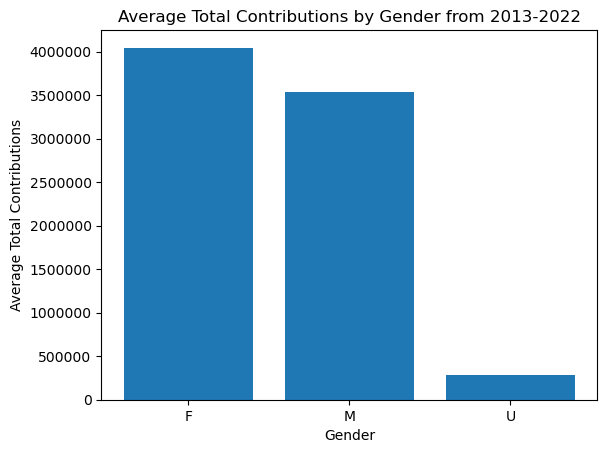

In [14]:
plt.bar(ave_gender_contribution.index, ave_gender_contribution.values)
plt.title("Average Total Contributions by Gender from 2013-2022")
plt.xlabel("Gender")
plt.ylabel("Average Total Contributions")
plt.ticklabel_format(style="plain", axis="y")
plt.savefig("Average Contributions by Gender")
plt.show()

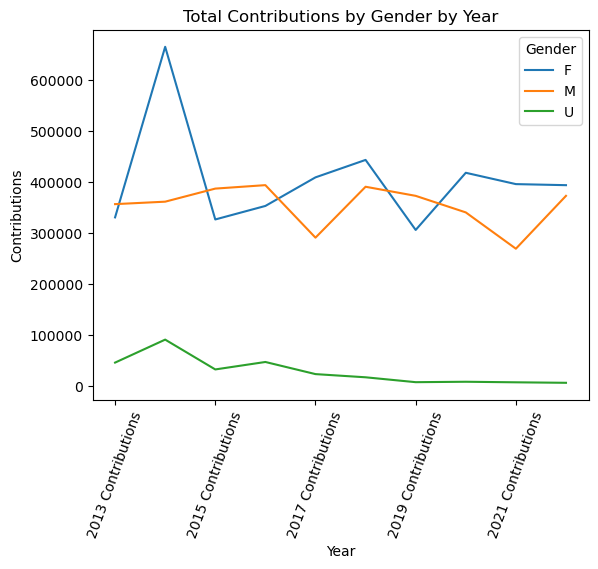

<Figure size 640x480 with 0 Axes>

In [15]:
yearly_contribution = merged_contribution_df.groupby(["Gender"])[["2013 Contributions","2014 Contributions","2015 Contributions", "2016 Contributions", "2017 Contributions", "2018 Contributions", "2019 Contributions", "2020 Contributions", "2021 Contributions", "2022 Contributions"]].mean()
yearly_contribution.T.plot(title = "Total Contributions by Gender by Year")
plt.xlabel("Year")
plt.ylabel("Contributions")
plt.xticks(rotation=70)
plt.show()
plt.savefig("Total Contributions line")

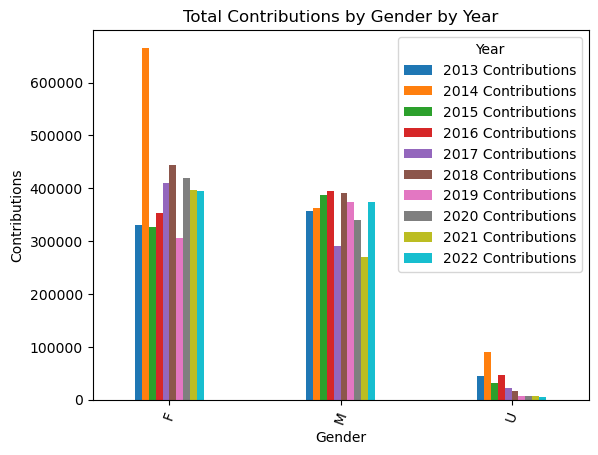

In [16]:
yearly_contribution = merged_contribution_df.groupby(["Gender"])[["2013 Contributions","2014 Contributions","2015 Contributions", "2016 Contributions", "2017 Contributions", "2018 Contributions", "2019 Contributions", "2020 Contributions", "2021 Contributions", "2022 Contributions"]].mean()

yearly_contribution.plot(kind='bar', width=0.4, title='Total Contributions by Gender by Year')
plt.xlabel('Gender')
plt.ylabel('Contributions')
plt.xticks(rotation=70)
plt.legend(title='Year')
plt.show()

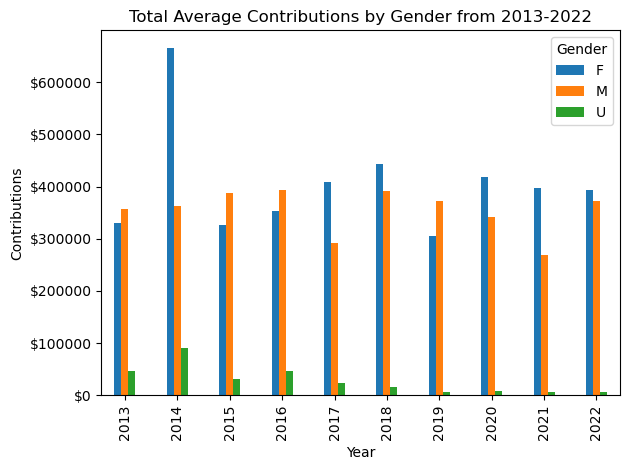

In [17]:
yearly_contribution.columns = yearly_contribution.columns.str.replace(' Contributions', '')

yearly_contribution.T.plot(kind='bar', width=0.4, align="center", title='Total Average Contributions by Gender from 2013-2022')
plt.xlabel('Year')
plt.ylabel('Contributions')
plt.legend(title='Gender')

# format the y-axis tick labels as currency
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)

# show the plot or save it to a file
plt.tight_layout()
plt.savefig("Total Average Contributions by gender and year")
plt.show()

In [18]:
repub_info = merged_contribution_df[merged_contribution_df["Party"] == "Republican"]

In [19]:
repub_gender_data = repub_info.groupby("Gender")["Total Contributions 2013-2022"].mean()

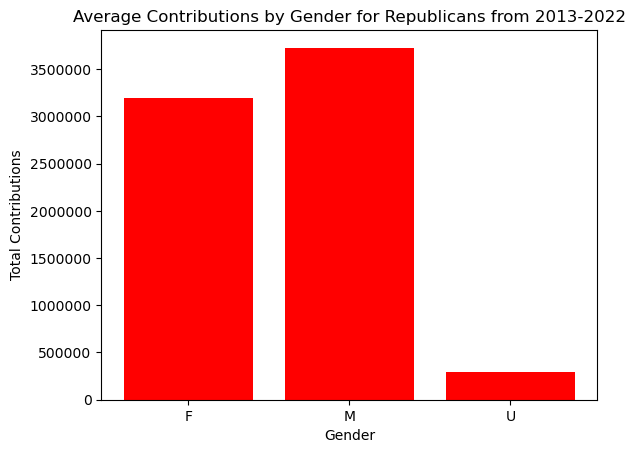

In [20]:
plt.bar(repub_gender_data.index, repub_gender_data.values, color="red")
plt.title("Average Contributions by Gender for Republicans from 2013-2022")
plt.xlabel("Gender")
plt.ylabel("Total Contributions")
plt.ticklabel_format(style="plain", axis="y")
plt.savefig("Republican ave contributions")
plt.show()

In [21]:
dem_info = merged_contribution_df[merged_contribution_df["Party"] == "Democratic"]

In [22]:
dem_gender_info = dem_info.groupby("Gender")["Total Contributions 2013-2022"].mean()

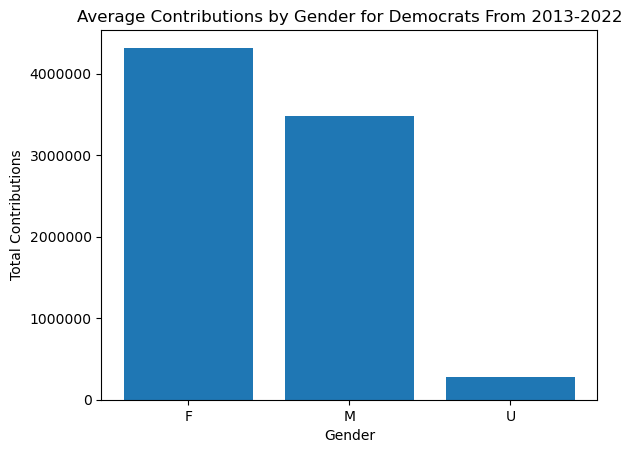

In [23]:
plt.bar(dem_gender_info.index, dem_gender_info.values)
plt.title("Average Contributions by Gender for Democrats From 2013-2022")
plt.xlabel("Gender")
plt.ylabel("Total Contributions")
plt.ticklabel_format(style="plain", axis="y")
plt.savefig("democrats ave contributions")
plt.show()

In [24]:
color_dict = {"M": "blue", "F": "red", "U" : "green"}

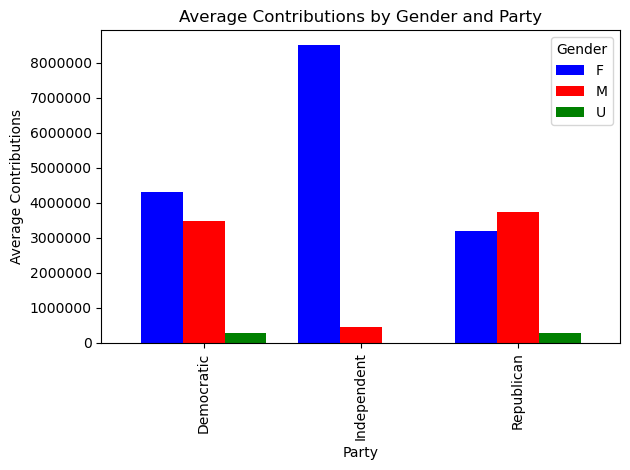

In [25]:
party_grouped = merged_contribution_df.groupby(["Party","Gender"])["Total Contributions 2013-2022"].mean()
party_grouped = party_grouped.drop(["Independent Democrat"])
party_grouped.unstack().plot(kind="bar", color=color_dict.values(), width=0.8)

plt.xlabel("Party")
plt.ylabel("Average Contributions")
plt.title("Average Contributions by Gender and Party")
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.savefig("ave contributions gender and party")
plt.show()

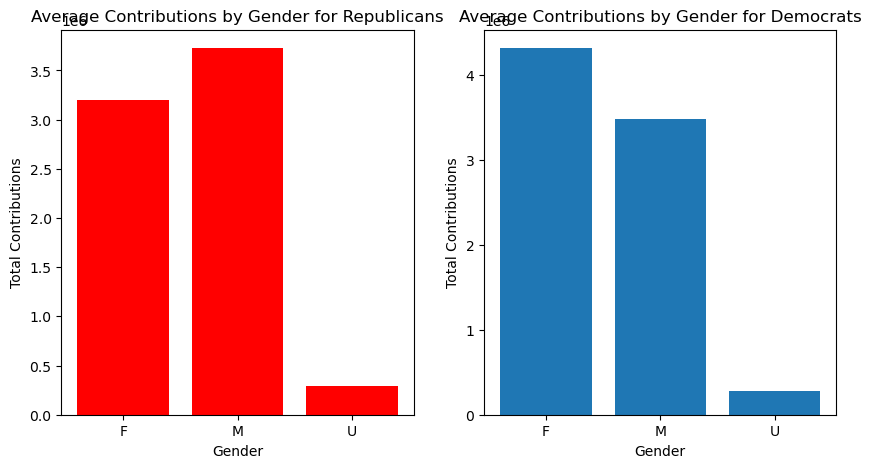

In [26]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].bar(repub_gender_data.index, repub_gender_data.values, color="red")
axs[0].set_title("Average Contributions by Gender for Republicans")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Total Contributions")

axs[1].bar(dem_gender_info.index, dem_gender_info.values)
axs[1].set_title("Average Contributions by Gender for Democrats")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Total Contributions")

plt.show()

In [27]:
from scipy.stats import linregress

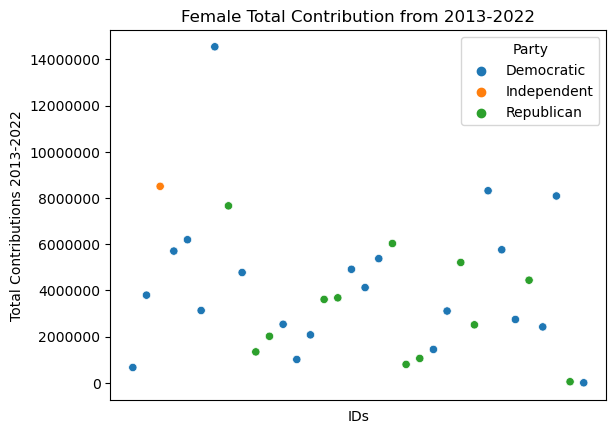

In [28]:
female_data = merged_contribution_df[merged_contribution_df["Gender"] == "F"]
sns.scatterplot(data=female_data, y="Total Contributions 2013-2022", x="Bio Guide ID", hue="Party")

plt.xlabel("IDs")
plt.xticks([],[])
plt.title("Female Total Contribution from 2013-2022")
plt.ticklabel_format(style="plain", axis="y")


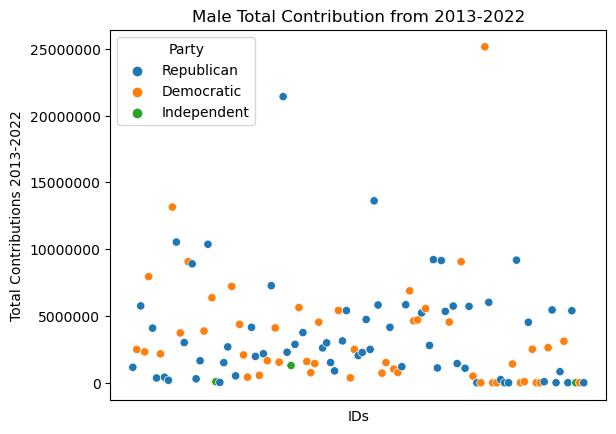

In [29]:
male_data = merged_contribution_df[merged_contribution_df["Gender"] == "M"]
sns.scatterplot(data=male_data, y="Total Contributions 2013-2022", x="Bio Guide ID", hue="Party")
plt.xlabel("IDs")
plt.xticks([],[])
plt.title("Male Total Contribution from 2013-2022")
plt.ticklabel_format(style="plain", axis="y")

In [30]:
ave_contrib = merged_contribution_df.groupby(["Gender", "Party"])["Total Contributions 2013-2022"].mean()
ave_contrib 

Gender  Party               
F       Democratic              4.317848e+06
        Independent             8.502348e+06
        Republican              3.197570e+06
M       Democratic              3.486300e+06
        Independent             4.586835e+05
        Republican              3.727048e+06
U       Democratic              2.748748e+05
        Independent             0.000000e+00
        Independent Democrat    0.000000e+00
        Republican              2.952402e+05
Name: Total Contributions 2013-2022, dtype: float64

In [31]:
ave_contrib = ave_contrib.drop(index='Independent Democrat', level='Party')

In [32]:
ave_contribution_df = pd.DataFrame(ave_contrib)
ave_contribution_df.rename(columns = {"Total Contributions 2013-2022" : "Average Contribution"}, inplace = True)

ave_contribution_df

Average Contribution
Gender Party                            
F      Democratic           4.317848e+06
       Independent          8.502348e+06
       Republican           3.197570e+06
M      Democratic           3.486300e+06
       Independent          4.586835e+05
       Republican           3.727048e+06
U      Democratic           2.748748e+05
       Independent          0.000000e+00
       Republican           2.952402e+05

In [33]:
update = ave_contribution_df.reset_index()
update

,Gender,Party,Average Contribution
0,F,Democratic,4.317848e+06
1,F,Independent,8.502348e+06
2,F,Republican,3.197570e+06
3,M,Democratic,3.486300e+06
4,M,Independent,4.586835e+05
5,M,Republican,3.727048e+06
6,U,Democratic,2.748748e+05
7,U,Independent,0.000000e+00
8,U,Republican,2.952402e+05


In [34]:
merged_contribution_df

,Unnamed: 0.1,Unnamed: 0,Bio Guide ID,Name,Party,State,District Number,Senate End Year,Senate Start Year,House Start Year,...,2016 Contributions,2017 Contributions,2018 Contributions,2019 Contributions,2020 Contributions,2021 Contributions,2022 Contributions,Total Contributions 2013-2022,Gender,Bill
0,0,0,B001305,"Budd, Ted",Republican,North Carolina,NaN,NaN,2023.0,2017.0,...,25759.50,71475.00,121167.26,122832.44,115319.00,85040.00,617763.90,1159357.10,M,131.0
1,1,1,W000817,"Warren, Elizabeth",Democratic,Massachusetts,NaN,NaN,2013.0,NaN,...,120439.03,197290.24,91004.55,21483.61,15893.35,10000.00,0.00,661869.59,F,545.0
2,2,2,W000802,"Whitehouse, Sheldon",Democratic,Rhode Island,NaN,NaN,2007.0,NaN,...,228049.75,541347.47,688087.10,126452.72,47500.00,115500.00,123350.00,2495891.31,M,551.0
3,3,3,Y000064,"Young, Todd",Republican,Indiana,NaN,NaN,2017.0,2011.0,...,971535.00,242447.54,258472.05,574320.00,480184.00,1054659.29,1133276.54,5757304.38,M,312.0
4,4,4,W000800,"Welch, Peter",Democratic,Vermont,NaN,NaN,2023.0,2007.0,...,211532.20,176490.63,184071.50,142045.18,165732.00,223171.83,487716.58,2316759.92,M,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,418,418,G000445,"Gregg, Judd",Republican,New Hampshire,NaN,2011.0,1993.0,1981.0,...,0.00,0.00,0.00,0.00,2000.00,0.00,0.00,2000.00,U,528.0
422,419,419,G000367,"Grams, Rod",Republican,Minnesota,NaN,2001.0,1995.0,1993.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,U,185.0
423,420,420,G000365,"Gramm, Phil",Republican,Texas,NaN,2002.0,1985.0,1979.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,U,887.0
424,421,421,G000321,"Gore, Albert,",Democratic,Tennessee,NaN,1993.0,1985.0,1977.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,U,298.0


In [35]:
ave_contribution_df.rename(columns = {"Total Contributions 2013-2022" : "Average Contribution"}, inplace = True)
ave_contribution_df

Average Contribution
Gender Party                            
F      Democratic           4.317848e+06
       Independent          8.502348e+06
       Republican           3.197570e+06
M      Democratic           3.486300e+06
       Independent          4.586835e+05
       Republican           3.727048e+06
U      Democratic           2.748748e+05
       Independent          0.000000e+00
       Republican           2.952402e+05

In [36]:
ave_contribution_df.rename(columns = {"Party" : "Political Parties"}, inplace=True)

In [37]:
ave_contribution_df

Average Contribution
Gender Party                            
F      Democratic           4.317848e+06
       Independent          8.502348e+06
       Republican           3.197570e+06
M      Democratic           3.486300e+06
       Independent          4.586835e+05
       Republican           3.727048e+06
U      Democratic           2.748748e+05
       Independent          0.000000e+00
       Republican           2.952402e+05

<AxesSubplot:xlabel='Average Contribution', ylabel='Party'>

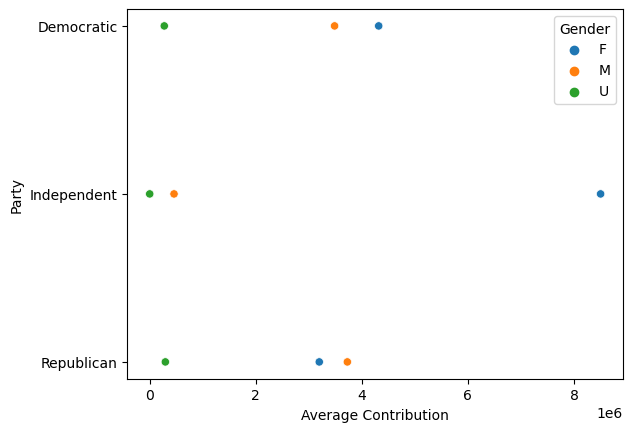

In [38]:
sns.scatterplot(data=ave_contribution_df.reset_index(), x='Average Contribution', y='Party', hue='Gender')

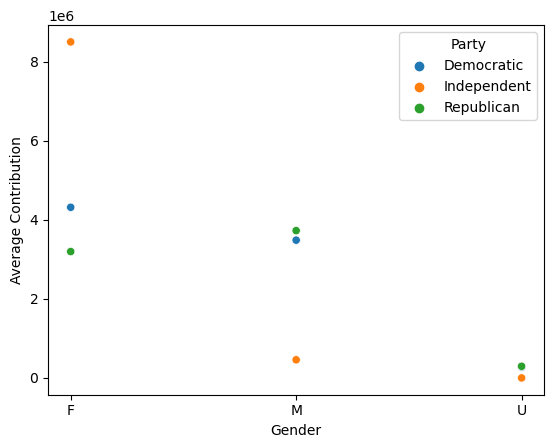

In [39]:
df_long = ave_contribution_df.reset_index()
sns.scatterplot(data=df_long, x='Gender', y='Average Contribution', hue='Party')

plt.show()

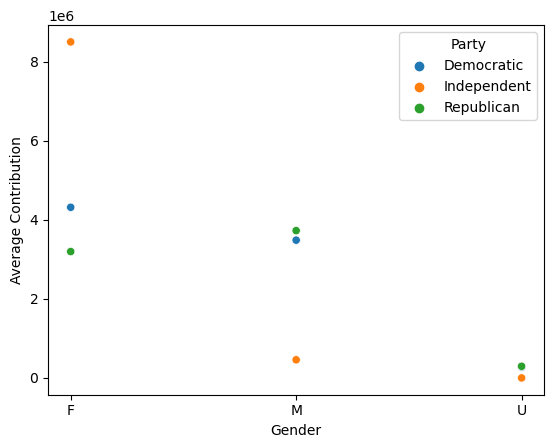

In [40]:
df_update = update
sns.scatterplot(data=df_update, x="Gender", y="Average Contribution", hue="Party")
plt.show()

In [41]:
ave_contribution_df.describe()

,Average Contribution
count,9.000000e+00
mean,2.695546e+06
std,2.787983e+06
min,0.000000e+00
25%,2.952402e+05
50%,3.197570e+06
75%,3.727048e+06
max,8.502348e+06


In [42]:
bills_sponsored = merged_contribution_df.groupby(["Bio Guide ID", "Bill", "Name", "Senate End Year"])["Total Contributions 2013-2022"].sum()
bills_sponsored 

Bio Guide ID  Bill   Name              Senate End Year
A000009       309.0  Abdnor, James     1987.0                  0.00
A000017       224.0  Abourezk, James   1979.0                  0.00
A000031       197.0  Adams, Brock      1993.0                  0.00
A000062       10.0   Aiken, George     1975.0                  0.00
A000069       794.0  Akaka, Daniel K.  2013.0                  0.00
                                                            ...    
W000782       65.0   Wyman, Louis C.   1975.0                  0.00
W000803       133.0  Webb, Jim         2013.0                  0.00
W000818       33.0   Walsh, John E.    2015.0             496855.52
Y000047       61.0   Young, Milton R.  1981.0                  0.00
Z000013       130.0  Zorinsky, Edward  1989.0                  0.00
Name: Total Contributions 2013-2022, Length: 317, dtype: float64

In [43]:
start_date = "2013"
drop_year = bills_sponsored.drop[(bills_sponsored["Senate End Year"]) > start_date]
drop_year

KeyError: 'Senate End Year'

In [44]:
bills_sponsored_df = pd.DataFrame(bills_sponsored).reset_index()
bills_sponsored_df

,Bio Guide ID,Bill,Name,Senate End Year,Total Contributions 2013-2022
0,A000009,309.0,"Abdnor, James",1987.0,0.00
1,A000017,224.0,"Abourezk, James",1979.0,0.00
2,A000031,197.0,"Adams, Brock",1993.0,0.00
3,A000062,10.0,"Aiken, George",1975.0,0.00
4,A000069,794.0,"Akaka, Daniel K.",2013.0,0.00
...,...,...,...,...,...
312,W000782,65.0,"Wyman, Louis C.",1975.0,0.00
313,W000803,133.0,"Webb, Jim",2013.0,0.00
314,W000818,33.0,"Walsh, John E.",2015.0,496855.52
315,Y000047,61.0,"Young, Milton R.",1981.0,0.00


In [45]:
corr = bills_sponsored_df['Bill'].corr(bills_sponsored_df['Total Contributions 2013-2022'])

print("Correlation coefficient between bill and total contribution:", corr)

Correlation coefficient between bill and total contribution: 0.12901826353424153


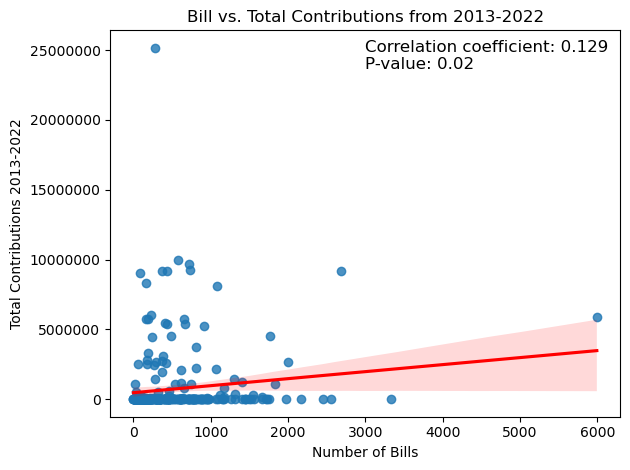

In [46]:
bill_df = bills_sponsored_df["Bill"]
contribution_df = bills_sponsored_df["Total Contributions 2013-2022"]
contribution_df.drop
sns.regplot(x=bill_df, y=contribution_df, line_kws={"color":"red"})

corr = bills_sponsored_df['Bill'].corr(bills_sponsored_df['Total Contributions 2013-2022'])
r, p = pearsonr(bill_df, contribution_df)
plt.text(0.5, 0.9, f"Correlation coefficient: {r:.3f}\nP-value: {p:.2f}", transform=plt.gca().transAxes, fontsize=12)

plt.xlabel("Number of Bills")
plt.ylabel("Total Contributions 2013-2022")
plt.title("Bill vs. Total Contributions from 2013-2022")
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.savefig("Bill and Contribution")
plt.show()

ValueError: x and y must have length at least 2.

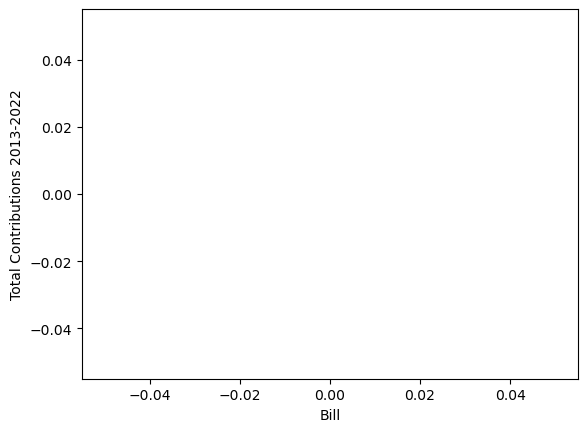

In [54]:
bills_sponsored_df["Senate End Year"] = pd.to_datetime(bills_sponsored_df["Senate End Year"])
bills_sponsored_df = bills_sponsored_df[bills_sponsored_df["Senate End Year"] >= "2013-01-01"]

# Create scatter plot with red trendline
bill_df = bills_sponsored_df["Bill"]
contribution_df = bills_sponsored_df["Total Contributions 2013-2022"]
sns.regplot(x=bill_df, y=contribution_df, line_kws={"color":"red"})

# Calculate correlation coefficient and p-value
corr = bills_sponsored_df['Bill'].corr(bills_sponsored_df['Total Contributions 2013-2022'])
r, p = pearsonr(bill_df, contribution_df)

# Add text to the plot
plt.text(0.5, 0.9, f"Correlation coefficient: {r:.3f}\nP-value: {p:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.xlabel("Number of Bills")
plt.ylabel("Total Contributions 2013-2022")
plt.title("Bill vs. Total Contributions from 2013-2022")
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.savefig("Bill and Contribution")
plt.show()

In [55]:
print(len(bill_df))
print(len(contribution_df))

0
0
